<a href="https://colab.research.google.com/github/rommeljpadilla/project2/blob/main/Project_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#What is the prime age,weight,height of an NBA player in terms of net rating? points? rebounds? assists?

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df = pd.read_csv('/content/drive/MyDrive/Data/all_seasons.csv')
df.head()


,Unnamed: 0,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,...,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
0,0,Travis Knight,LAL,22,213.36,106.59412,Connecticut,USA,1996,1,...,4.8,4.5,0.5,6.2,0.127,0.182,0.142,0.536,0.052,1996-97
1,1,Matt Fish,MIA,27,210.82,106.59412,North Carolina-Wilmington,USA,1992,2,...,0.3,0.8,0.0,-15.1,0.143,0.267,0.265,0.333,0.000,1996-97
2,2,Matt Bullard,HOU,30,208.28,106.59412,Iowa,USA,Undrafted,Undrafted,...,4.5,1.6,0.9,0.9,0.016,0.115,0.151,0.535,0.099,1996-97
3,3,Marty Conlon,BOS,29,210.82,111.13004,Providence,USA,Undrafted,Undrafted,...,7.8,4.4,1.4,-9.0,0.083,0.152,0.167,0.542,0.101,1996-97
4,4,Martin Muursepp,DAL,22,205.74,106.59412,None,USA,1996,1,...,3.7,1.6,0.5,-14.5,0.109,0.118,0.233,0.482,0.114,1996-97


In [5]:
df.info()

#There are no missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11700 entries, 0 to 11699
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         11700 non-null  int64  
 1   player_name        11700 non-null  object 
 2   team_abbreviation  11700 non-null  object 
 3   age                11700 non-null  int64  
 4   player_height      11700 non-null  float64
 5   player_weight      11700 non-null  float64
 6   college            11700 non-null  object 
 7   country            11700 non-null  object 
 8   draft_year         11700 non-null  object 
 9   draft_round        11700 non-null  object 
 10  draft_number       11700 non-null  object 
 11  gp                 11700 non-null  int64  
 12  pts                11700 non-null  float64
 13  reb                11700 non-null  float64
 14  ast                11700 non-null  float64
 15  net_rating         11700 non-null  float64
 16  oreb_pct           117

In [6]:
#dropping unneeded columns

df = df.drop(columns=['Unnamed: 0','country', 'draft_year', 'draft_round', 'draft_number', 'college'])



In [7]:
df.duplicated().sum()

#There are no duplicates in the dataset

0

In [8]:
#Looking at numerical values for any inconsistencies

df.describe()

#height is in centimeters
#weight is in kilograms
#Looks like there are outliers in the net_rating. This occurs when an NBA player plays very limited games and performs very poor/great
#Also looks like limited # of games are causing outliers in the _pct categories

,age,player_height,player_weight,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct
count,11700.000000,11700.000000,11700.000000,11700.000000,11700.000000,11700.000000,11700.000000,11700.000000,11700.000000,11700.000000,11700.000000,11700.000000,11700.000000
mean,27.131966,200.728501,100.526791,51.717179,8.169299,3.564957,1.811179,-2.166410,0.054981,0.141534,0.185380,0.510402,0.131228
std,4.340006,9.169827,12.526481,24.985236,5.956115,2.487498,1.792117,12.076914,0.043595,0.062793,0.052957,0.098306,0.094244
min,18.000000,160.020000,60.327736,1.000000,0.000000,0.000000,0.000000,-200.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,24.000000,193.040000,90.718400,32.000000,3.600000,1.800000,0.600000,-6.300000,0.021000,0.096000,0.150000,0.479000,0.065000
50%,26.000000,200.660000,99.790240,58.000000,6.700000,3.000000,1.200000,-1.300000,0.042000,0.132000,0.182000,0.523000,0.103000
75%,30.000000,208.280000,108.862080,74.000000,11.500000,4.700000,2.400000,3.200000,0.084000,0.180000,0.218000,0.559000,0.178000
max,44.000000,231.140000,163.293120,85.000000,36.100000,16.300000,11.700000,300.000000,1.000000,1.000000,1.000000,1.500000,1.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11700 entries, 0 to 11699
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   player_name        11700 non-null  object 
 1   team_abbreviation  11700 non-null  object 
 2   age                11700 non-null  int64  
 3   player_height      11700 non-null  float64
 4   player_weight      11700 non-null  float64
 5   gp                 11700 non-null  int64  
 6   pts                11700 non-null  float64
 7   reb                11700 non-null  float64
 8   ast                11700 non-null  float64
 9   net_rating         11700 non-null  float64
 10  oreb_pct           11700 non-null  float64
 11  dreb_pct           11700 non-null  float64
 12  usg_pct            11700 non-null  float64
 13  ts_pct             11700 non-null  float64
 14  ast_pct            11700 non-null  float64
 15  season             11700 non-null  object 
dtypes: float64(11), int64(

In [10]:
df['team_abbreviation'].value_counts()

CLE    411
TOR    408
LAC    408
MIA    405
HOU    402
DAL    401
PHI    401
ATL    400
WAS    399
SAS    395
GSW    393
DEN    392
LAL    390
MIL    390
ORL    390
IND    390
NYK    389
CHI    386
BOS    385
POR    383
MIN    382
SAC    378
PHX    377
UTA    377
DET    375
MEM    330
CHA    271
NJN    257
OKC    213
SEA    182
BKN    163
NOH    143
NOP    141
CHH     89
VAN     72
NOK     32
Name: team_abbreviation, dtype: int64

In [11]:
df['season'].value_counts()

2020-21    540
2017-18    540
2018-19    530
2019-20    529
2014-15    492
2016-17    486
2013-14    482
2011-12    478
2015-16    476
2012-13    469
2004-05    464
2005-06    458
2006-07    458
2010-11    452
2007-08    451
2008-09    445
2009-10    442
2003-04    442
2000-01    441
1996-97    441
2001-02    440
1997-98    439
1998-99    439
1999-00    438
2002-03    428
Name: season, dtype: int64

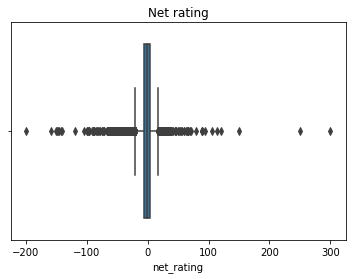

In [12]:
ax = sns.boxplot(data=df, x = 'net_rating')
ax.set_title('Net rating');

#We see that our previous worry of limited games can greatly affect the net rating

In [13]:
#testing puting a filter on games played
gp_filter = df['gp'] > 41
df_gp_filter = df.loc[gp_filter, :]

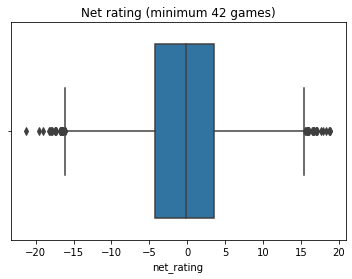

In [14]:
ax = sns.boxplot(data=df_gp_filter, x = 'net_rating')
ax.set_title('Net rating (minimum 42 games)');

In [15]:
#comparing the games played filter

print(df_gp_filter['net_rating'].describe())
print('\n')
print(df['net_rating'].describe())

count    7894.000000
mean       -0.303167
std         5.871780
min       -21.300000
25%        -4.300000
50%        -0.200000
75%         3.600000
max        18.900000
Name: net_rating, dtype: float64


count    11700.000000
mean        -2.166410
std         12.076914
min       -200.000000
25%         -6.300000
50%         -1.300000
75%          3.200000
max        300.000000
Name: net_rating, dtype: float64


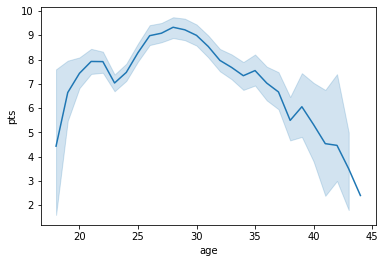

In [16]:

sns.lineplot(data=df, x="age", y="pts");

#This indicates that an NBA's prime years in terms of points appears to be 27-29yrs old

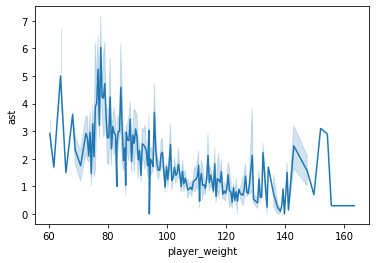

In [17]:
sns.lineplot(data=df, x="player_weight", y="ast");

#Usually, smaller players are quicker and more known to be point guards. The assists stat is usually assoiciated to this position

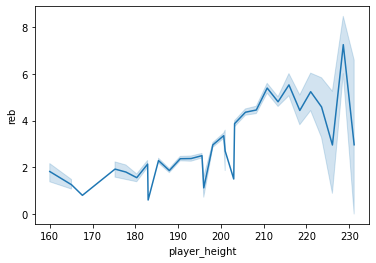

In [18]:
sns.lineplot(data=df, x="player_height", y="reb");

#A taller a player is, the more rebounds they are able to get. However, we do see a drop at a certain point.
#This shows that quickness is also important. 

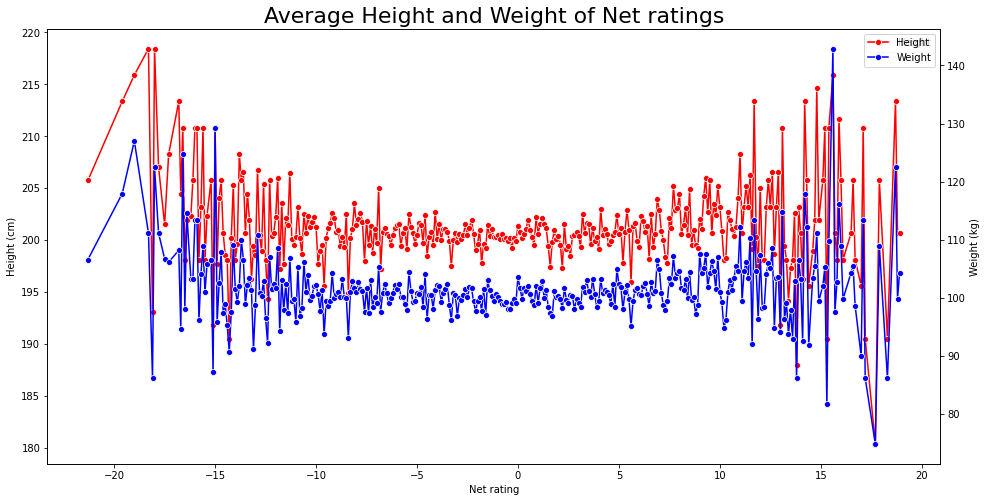

In [19]:
fig, ax = plt.subplots(figsize=(16, 8))
ax2 = ax.twinx()

sns.lineplot(x=df_gp_filter['net_rating'], y='player_height', data=df_gp_filter, marker="o", ax=ax, ci=None, label='Height', color='red')
sns.lineplot(x=df_gp_filter['net_rating'], y='player_weight', data=df_gp_filter, marker="o", ax=ax2, ci=None, label='Weight', color='blue')

plt.title('Average Height and Weight of Net ratings', fontsize=22)
ax.xaxis.set_label_text('Net rating')
ax.yaxis.set_label_text('Height (cm)')
ax2.yaxis.set_label_text('Weight (kg)')

lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc=0)

plt.show()

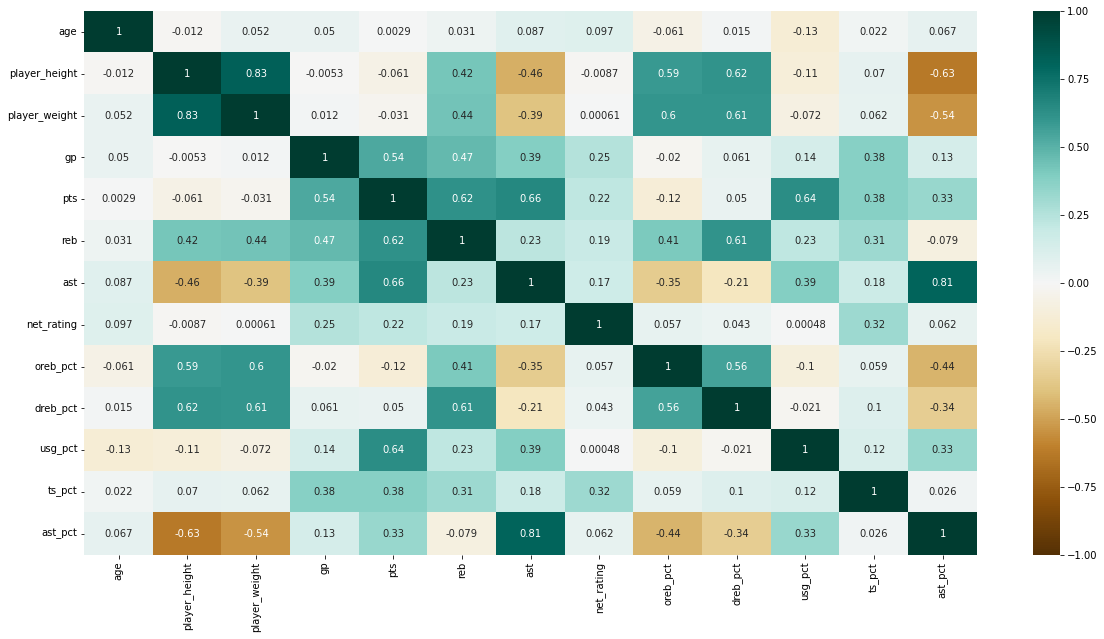

In [26]:
plt.figure(figsize=(20, 10))
sns.heatmap(df.corr(),
            vmin=-1,
            vmax=1,
            annot=True,
            cmap='BrBG');